## GRIP- THE SPARKS FOUNDATION
## Data Science & Business Analytics Internship

## AUTHOR -  **VIVEK RANJAN**

# Task-1 : Prediction using Supervised ML

### Predict the percentage of a student based on the no. of study hours. This is a simple linear regression task as it involves just 2 variables.

### *Import the required libraires*

In [48]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn import metrics  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import r2_score

### *Reading data*

In [49]:
url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)

In [50]:
student_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [51]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [52]:
student_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [53]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### *Plotting the distribution of scores and hours on line plot*

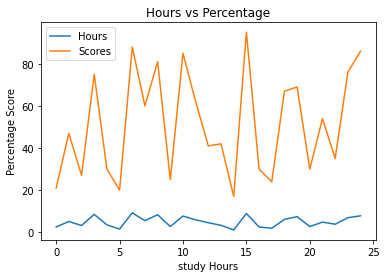

In [54]:
student_data.plot(kind='line')  
plt.title('Hours vs Percentage')  
plt.xlabel('study Hours')  
plt.ylabel('Percentage Score')  
plt.show()

### *Data Visualization*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0B7BDB040>,
      dtype=object)

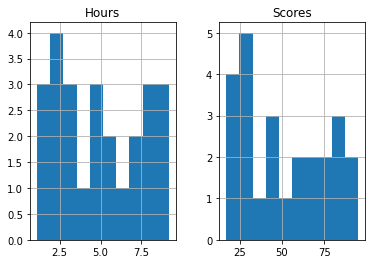

In [55]:
student_data.hist()

### *Preparing the data*

In [56]:
X = student_data.iloc[:, :-1].values  
Y = student_data.iloc[:, 1].values
print(X,Y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]] [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

### *Training the Algorithm* 

In [58]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

LinearRegression()

### *Plotting the regression line*


In [59]:
line = regressor.coef_*X+regressor.intercept_

### *Plotting for the test data* 

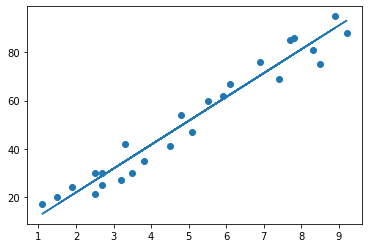

In [60]:
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

### *Making Predictions*

Testing data - In Hours

In [61]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Predicting the scores

In [62]:
Y_pred = regressor.predict(X_test)

Comparing Actual vs Predicted

In [63]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Testing and finding prediction for 9.5 hours study/ day

In [64]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print(f"No of Hours = {hours}")
print(f"Predicted Score = {own_pred[0]}")

No of Hours = 9.25
Predicted Score = 93.69173248737539


### *Evaluating the model*

In [65]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 
print('Mean Squared Error:',metrics.mean_squared_error(Y_test, Y_pred)) 
print('R2 Score:', r2_score(Y_test, Y_pred)) 

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
R2 Score: 0.9454906892105354
